# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## [20 points] Multi-class Classification

In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [3]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [5]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
#                          "A sample model summary is shown below")
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3), classes=512) 
vgg16.trainable = False
conv_1 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='conv_1')
conv_2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='conv_2')
flatten_1 = tf.keras.layers.Flatten(name='flatten_1')
dropout_1 = tf.keras.layers.Dropout(0.25, name='dropout_1')
dense_feature = tf.keras.layers.Dense(512, activation='relu',name='dense_feature')
dropout_2 = tf.keras.layers.Dropout(0.25, name='dropout_2')
dense_output = tf.keras.layers.Dense(4, name = 'dense_output', activation='softmax') # softmax for multiclass; 4 classes in total
    
model = tf.keras.Sequential([vgg16,conv_1,conv_2,
                             flatten_1,dropout_1,dense_feature,dropout_2,dense_output],name='task2')
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "task2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv_1 (Conv2D)              (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv_2 (Conv2D)              (None, 7, 7, 256)         590080    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 512)               6423040   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0     

#### [5 points] Train Model

In [6]:
# change the learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=10000,
    decay_rate=0.96)

# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience=50, verbose=2,restore_best_weights=False)

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

#raise NotImplementedError("Use the model.fit function to train your network")
history = model.fit_generator(generator=train_batches,epochs=NUM_EPOCHS, validation_data=valid_batches,
                   steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,shuffle=True,callbacks=[early_stopping])

22
6
21
5
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100


C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\17620\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 26s 1s/step - loss: 1.9534 - accuracy: 0.2476 - val_loss: 1.3721 - val_accuracy: 0.3600
Epoch 2/100
21/21 [==============================] - 25s 1s/step - loss: 1.3827 - accuracy: 0.2621 - val_loss: 1.3060 - val_accuracy: 0.5000
Epoch 3/100
21/21 [==============================] - 24s 1s/step - loss: 1.3163 - accuracy: 0.3738 - val_loss: 1.1686 - val_accuracy: 0.4800
Epoch 4/100
21/21 [==============================] - 24s 1s/step - loss: 1.1663 - accuracy: 0.4175 - val_loss: 1.0590 - val_accuracy: 0.4800
Epoch 5/100
21/21 [==============================] - 23s 1s/step - loss: 1.1890 - accuracy: 0.4515 - val_loss: 1.1542 - val_accuracy: 0.3800
Epoch 6/100
21/21 [==============================] - 23s 1s/step - loss: 1.1992 - accuracy: 0.4612 - val_loss: 1.0154 - val_accuracy: 0.5000
Epoch 7/100
21/21 [==============================] - 23s 1s/step - loss: 1.1006 - accuracy: 0.4369 - val_loss: 1.0833 - val_accuracy: 0.4800
Epoch 8/100
21/21 [======

#### [5 points] Plot Accuracy and Loss During Training

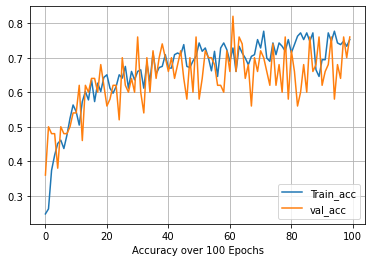

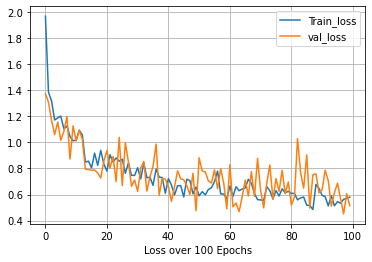

In [7]:
import matplotlib.pyplot as plt

#raise NotImplementedError("Plot the accuracy and the loss during training")

plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Accuracy over 100 Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Loss over 100 Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Testing Model

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
36/36 [==============================] - 4s 98ms/step - loss: 1.4518 - accuracy: 0.6944
Test loss: 1.4517992918974616
Test accuracy: 0.6944444


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

In [9]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,outputs=model.get_layer('dense_feature').output)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                       batch_size=1,shuffle=False,class_mode="categorical")

#raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                          "and plot the resulting 2D features of the four classes.")

X = intermediate_layer_model.predict_generator(tsne_data_generator)
tsne = TSNE(n_components=2,verbose=1, perplexity=30,n_iter=1000, learning_rate=200, init='pca')
X_tsne = tsne.fit_transform(X)

tsne_x = X_tsne[:, 0]
tsne_y = X_tsne[:, 1]

Found 270 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.020s...
[t-SNE] Computed neighbors for 270 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 2.980482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.388519
[t-SNE] KL divergence after 1000 iterations: 0.252044


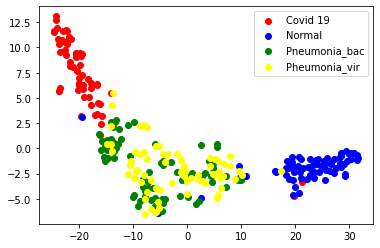

In [10]:
name_dic = {0:'Covid 19', 1:'Normal', 2:'Pneumonia_bac', 3:'Pheumonia_vir'}
color_dic = {0:'red', 1:'blue', 2:'green', 3:'yellow'}

labels = tsne_data_generator.labels 

choose_0 = []
choose_1 = []
choose_2 = []
choose_3 = []

for i in range(len(tsne_x)):
    if labels[i] == 0:
        choose_0.append(i)
    elif labels[i] == 1:
        choose_1.append(i)
    elif labels[i] == 2:
        choose_2.append(i)
    else:
        choose_3.append(i)

partial_tsne_x_0 = np.take(tsne_x, choose_0)
partial_tsne_y_0 = np.take(tsne_y, choose_0)
    
plt.scatter(partial_tsne_x_0, partial_tsne_y_0, label=name_dic[0], color=color_dic[0], marker='o')

partial_tsne_x_1 = np.take(tsne_x, choose_1)
partial_tsne_y_1 = np.take(tsne_y, choose_1)
    
plt.scatter(partial_tsne_x_1, partial_tsne_y_1, label=name_dic[1], color=color_dic[1], marker='o')

partial_tsne_x_2 = np.take(tsne_x, choose_2)
partial_tsne_y_2 = np.take(tsne_y, choose_2)
    
plt.scatter(partial_tsne_x_2, partial_tsne_y_2, label=name_dic[2], color=color_dic[2], marker='o')

partial_tsne_x_3 = np.take(tsne_x, choose_3)
partial_tsne_y_3 = np.take(tsne_y, choose_3)
    
plt.scatter(partial_tsne_x_3, partial_tsne_y_3, label=name_dic[3], color=color_dic[3], marker='o')
    
plt.legend(loc='best')
plt.show()

In [11]:
# save the model
model.save('task2_new_VGG19.h5')

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->